**Q1) Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.**

EDA and Data Visualization, Feature Engineering, Correlation Analysis, Model Building, Model Testing and Model Predictions using simple linear regression.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# import dataset
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
dataset=pd.read_csv("delivery_time.csv")

In [ ]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## **EDA and Data Visualization**

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset.shape

(21, 2)

In [ ]:
dataset.dtypes

delivery_time    float64
sorting_time       int64
dtype: object

In [ ]:
dataset.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

<Axes: >

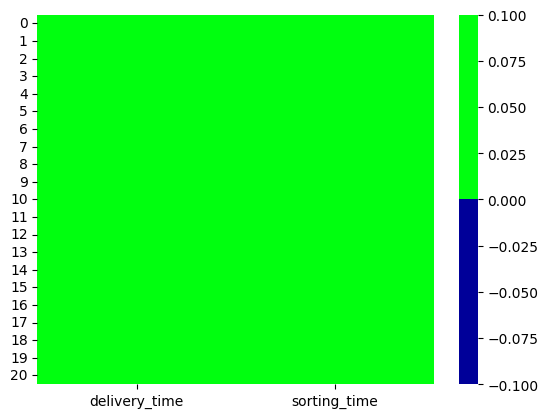

In [85]:
#to genrate heat map
cols = dataset.columns
colors = ['#000099', '#00ff0f']   #define colors, green for missing, blue for non missing
sns.heatmap(dataset[cols].isnull(),
               cmap= sns.color_palette(colors))

In [ ]:
dataset.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7e7ccddbfca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7ccdde8220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7ccddbfa00>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7ccdde8760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7ccdde8a00>],
 'means': []}

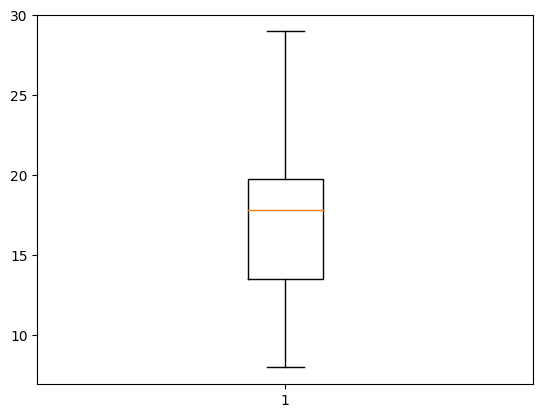

In [ ]:

#Outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(dataset['delivery_time'])

<ipython-input-6-ea2f6099b8bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

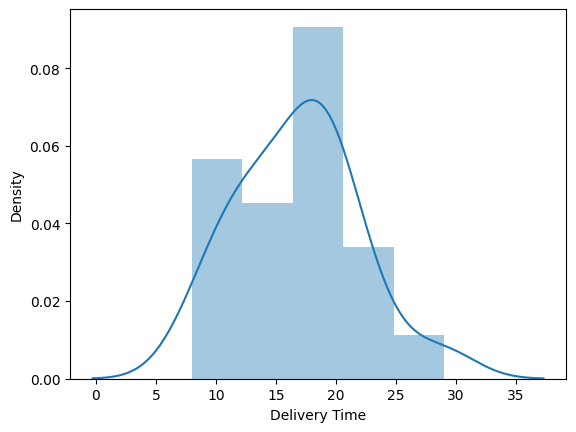

In [ ]:
sns.distplot(dataset['Delivery Time'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7e7ccdc35b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7ccdc36050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7ccdc35990>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7ccdc36590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7ccdc36830>],
 'means': []}

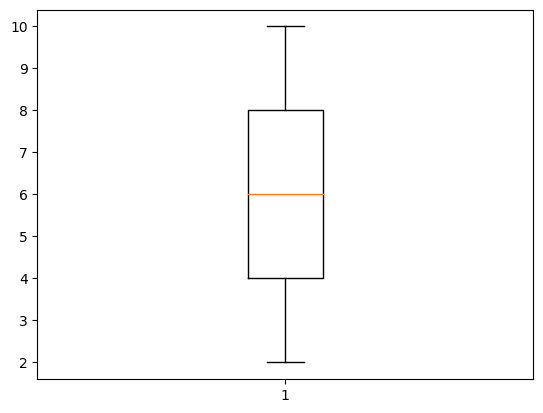

In [ ]:

plt.boxplot(dataset['sorting_time'])

<ipython-input-7-87e4431da1bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

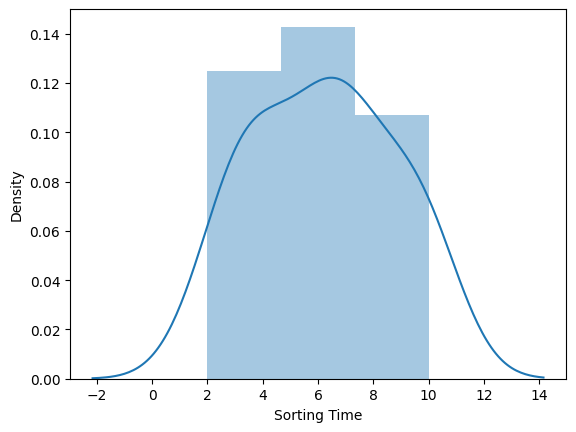

In [ ]:
sns.distplot(dataset['Sorting Time'])


## **Feature Engineering**

In [ ]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Performing Transformation on each column**

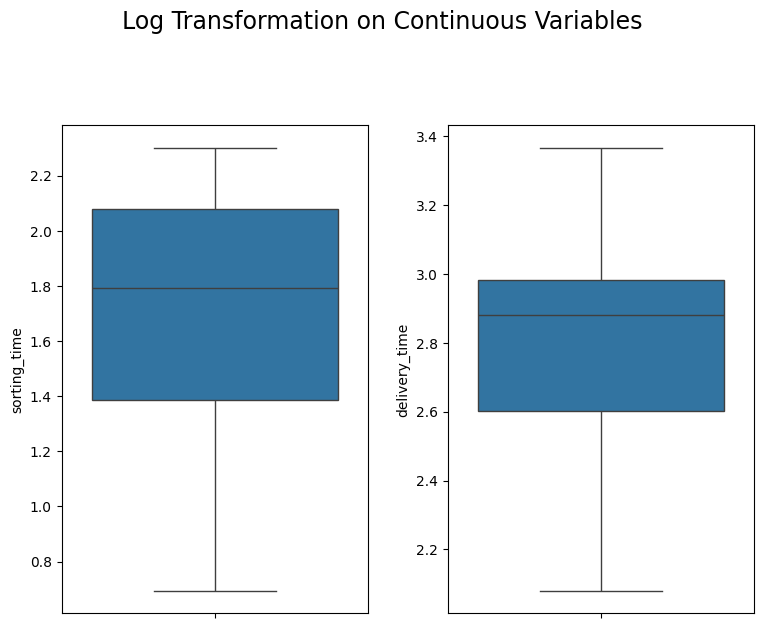

In [ ]:

fig, ax=plt.subplots(1,2, figsize=(8,6), sharex= False, sharey = False)
sns.boxplot(np.log(dataset.sorting_time), ax=ax[0])
sns.boxplot(np.log(dataset.delivery_time), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

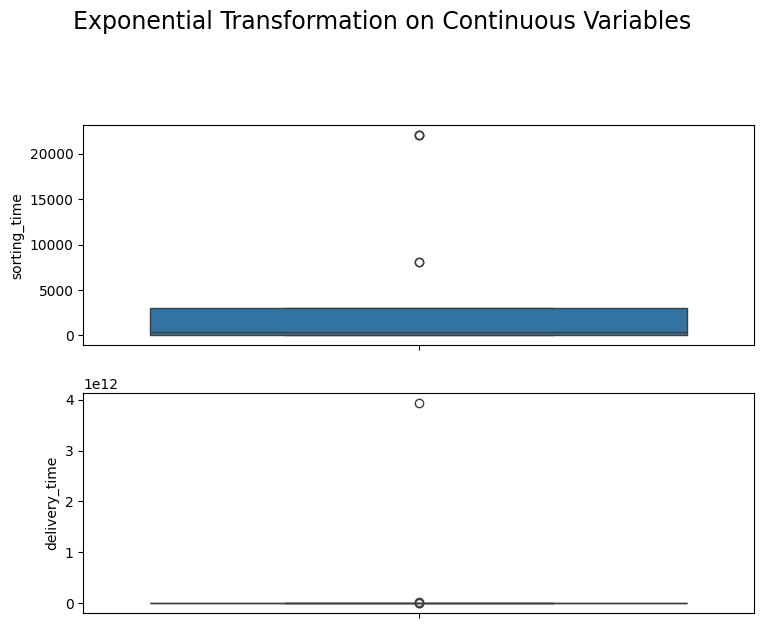

In [89]:

fig, ax=plt.subplots(2, figsize=(8,6), sharex= False, sharey = False)
sns.boxplot(np.exp(dataset.sorting_time), ax=ax[0])
sns.boxplot(np.exp(dataset.delivery_time), ax=ax[1])
plt.suptitle("Exponential Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

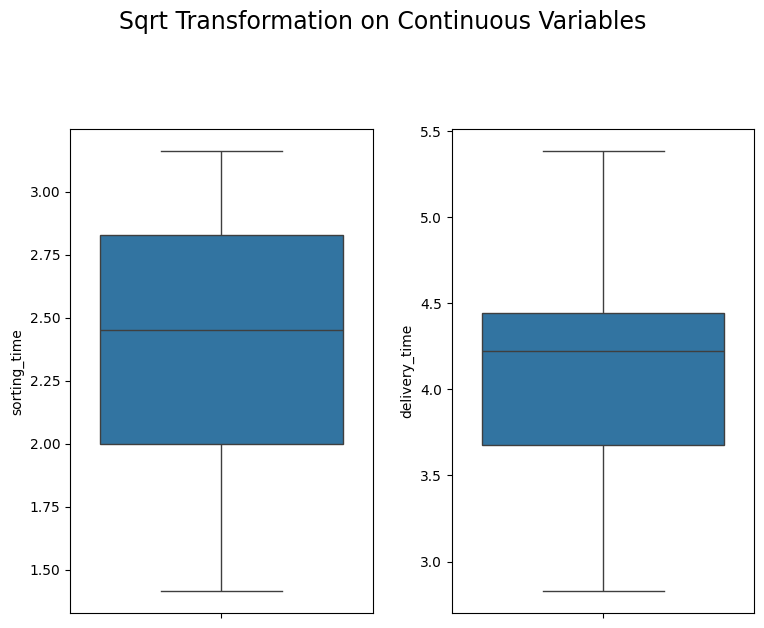

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(8,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(dataset.sorting_time), ax=ax[0])
sns.boxplot(np.sqrt(dataset.delivery_time), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

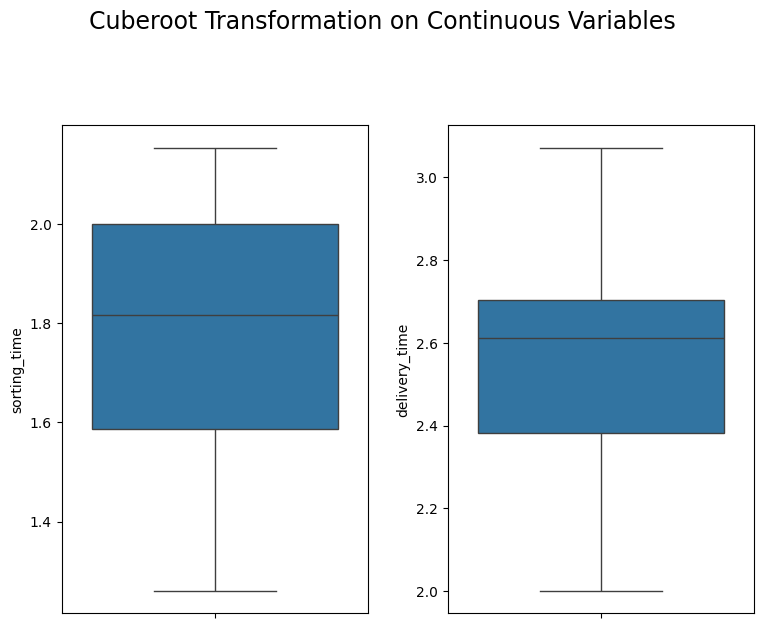

In [90]:
fig, ax=plt.subplots(1,2, figsize=(8,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(dataset.sorting_time), ax=ax[0])
sns.boxplot(np.cbrt(dataset.delivery_time), ax=ax[1])
plt.suptitle("Cuberoot Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

## **Correlation Analysis**

In [ ]:
dataset.corr()


,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


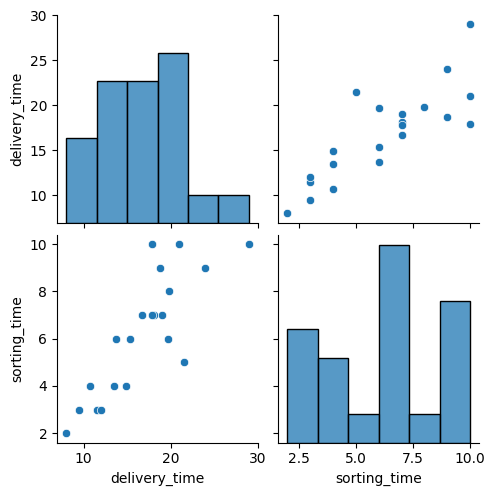

In [ ]:
sns.pairplot(dataset)


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

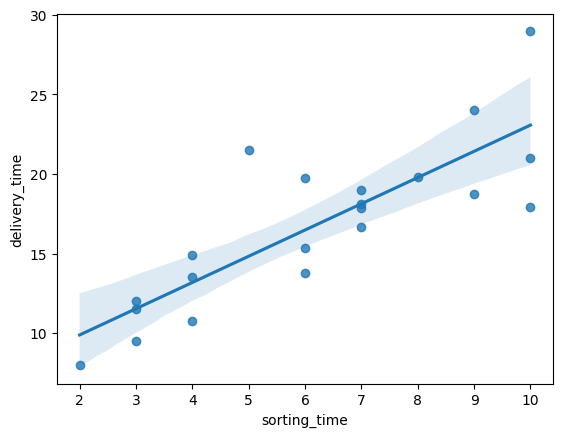

In [ ]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])


# **Model Building**


In [ ]:
#Fitting a Regression Equation
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()


## **Model Testing**


In [ ]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## **Model Predictions**


In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           3.98e-06
Time:                        07:19:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

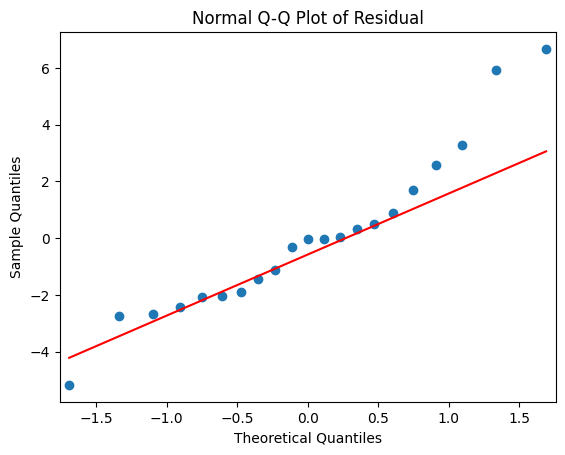

In [ ]:
#Residual Analysis

#Test for Noramlity of Residual through QQ plot

#q line is the 45 degrees line
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()

In [ ]:
list(np.where(model.resid>6))

[array([20])]

***Residual plot for Homoscedasticity***

In [ ]:
def get_standardize_values( vals):
  return (vals - vals.mean())/vals.std() # get standardized values of fitted values and residual

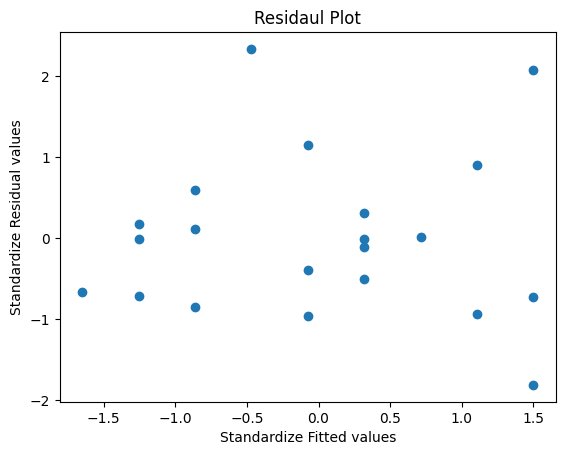

In [ ]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()


***Residual vs Regressors***

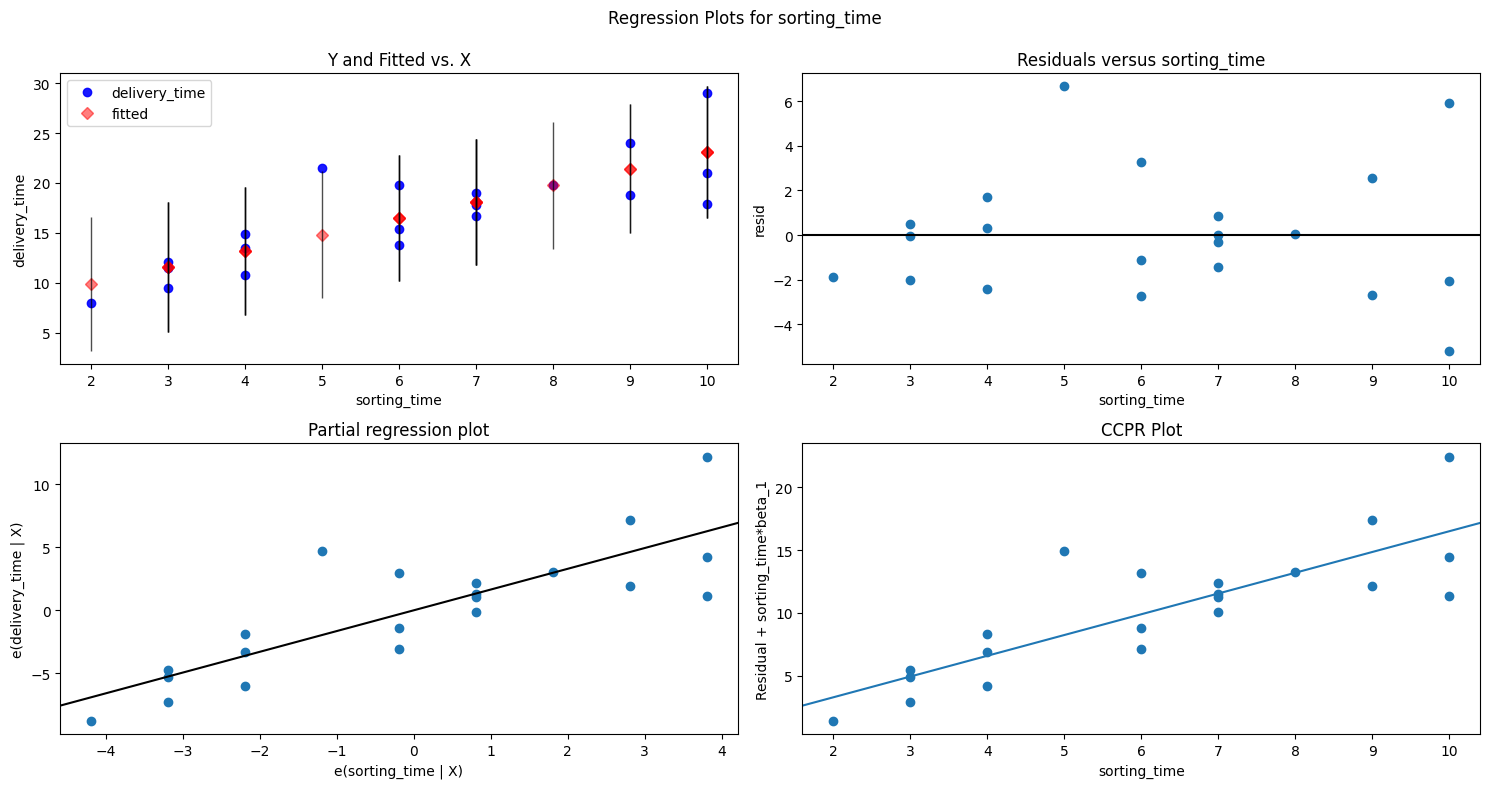

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sorting_time", fig=fig)
plt.show()


**Model Deletion by Cook's Distance and Leverage value**

In [ ]:

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

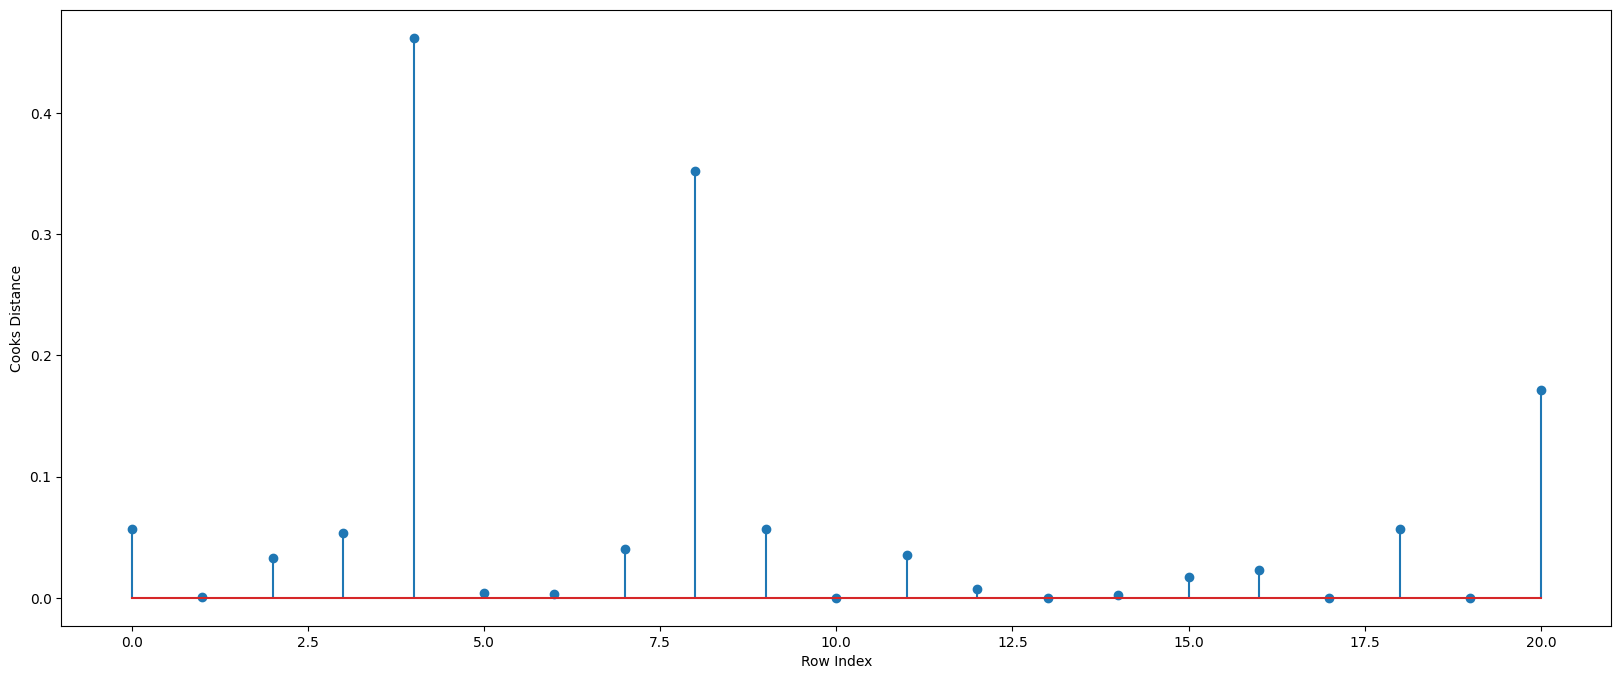

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(dataset)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()


In [ ]:

#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(4, 0.462053041265031)

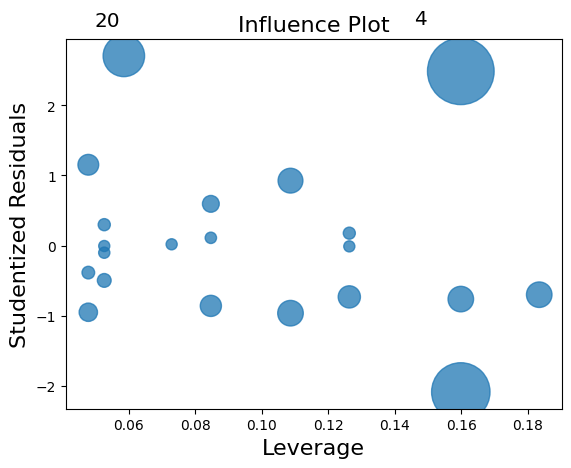

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = dataset.shape[1]
n = dataset.shape[0]
leverage_cutoff = 3*(k+1)/n

In [ ]:
leverage_cutoff



0.42857142857142855

*#From the above plots, as C<1 & leverage_cutoff value is higher than any datapoint, hence we will not delete any datapoint.*





**Prediction**

In [ ]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [ ]:
# Automatic Prediction for say sorting time 5, 10
new_data=pd.Series([5,10])
new_data

0     5
1    10
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,10


In [ ]:
model.predict(data_pred)


0    14.827833
1    23.072933
dtype: float64

***END OF THE PROJECT fOR Q1***